In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
filtered_data= df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

filtered_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


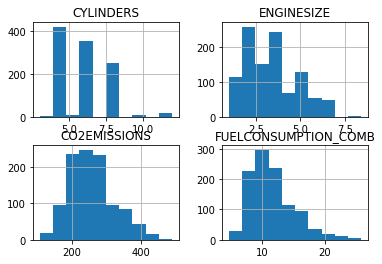

In [5]:
histogram = filtered_data[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
histogram.hist()
plt.show()

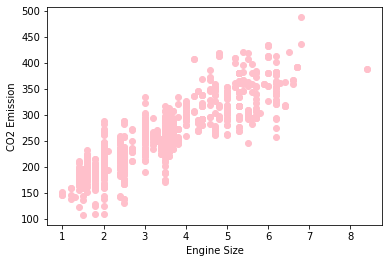

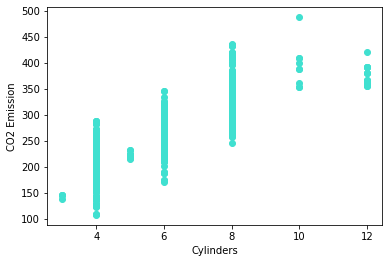

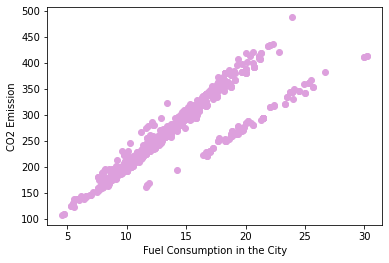

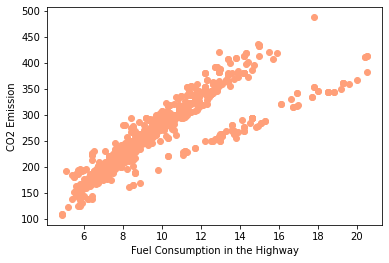

In [6]:
plt.scatter(filtered_data.ENGINESIZE, filtered_data.CO2EMISSIONS, color ='pink')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")

plt.show()

plt.scatter(filtered_data.CYLINDERS, filtered_data.CO2EMISSIONS, color ='turquoise')
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emission")

plt.show()

plt.scatter(filtered_data.FUELCONSUMPTION_CITY, filtered_data.CO2EMISSIONS, color ='plum')
plt.xlabel("Fuel Consumption in the City")
plt.ylabel("CO2 Emission")

plt.show()

plt.scatter(filtered_data.FUELCONSUMPTION_HWY, filtered_data.CO2EMISSIONS, color ='lightsalmon')
plt.xlabel("Fuel Consumption in the Highway")
plt.ylabel("CO2 Emission")

plt.show()

In [7]:
msk=np.random.rand(len(df))<0.8
train=filtered_data[msk]
test=filtered_data[~msk]

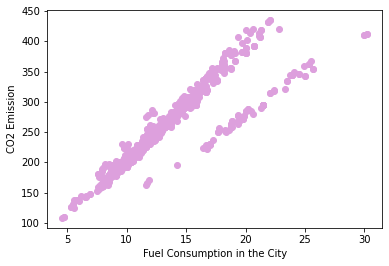

In [8]:
plt.scatter(train.FUELCONSUMPTION_CITY,train.CO2EMISSIONS, color = 'plum')
plt.xlabel("Fuel Consumption in the City")
plt.ylabel("CO2 Emission")
plt.show()

In [9]:
from sklearn import linear_model

In [10]:
regression=linear_model.LinearRegression()
x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
y=np.asanyarray(train[['CO2EMISSIONS']])

regression.fit(x,y)

print ('Coefficients:',regression.coef_)

Coefficients: [[ 11.0660803    6.80066045 -14.63645186 -15.34899331  38.91981046]]


In [11]:
#y_hat estimated output
y_hat= regression.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regression.score(x, y))

Residual sum of squares: 585.86
Variance score: 0.87


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
